Linear regression will serve as a baseline prediction. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

C:\Users\rezan\AppData\Local\Continuum\anaconda3\envs\thesis_env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
path = r"C:\Users\rezan\Documents\Master in Applied Data Science\2nd Year\MASTER THESIS\GIT THESIS\geopy\france_cleaned"

data = pd.read_csv(path+'\\'+'Alsace.csv')

In [3]:
data

,LAT,LON,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,48.24919,7.40748,T2M,1981,-2.68,-1.23,6.74,8.99,12.46,15.47,16.75,17.32,14.64,8.35,3.39,-0.91,8.33
1,48.24919,7.40748,T2M,1982,-0.61,0.95,3.73,6.58,12.78,16.68,19.17,16.91,16.22,9.05,5.41,1.32,9.06
2,48.24919,7.40748,T2M,1983,1.79,-2.17,4.25,8.29,10.53,16.74,20.92,18.27,13.86,8.93,2.99,-0.13,8.76
3,48.24919,7.40748,T2M,1984,-0.37,-0.78,2.22,6.77,9.87,14.59,17.00,17.36,12.68,9.80,6.00,0.88,8.03
4,48.24919,7.40748,T2M,1985,-6.54,-1.17,2.45,7.77,12.96,14.06,18.40,17.03,15.13,9.23,0.37,1.68,7.67
5,48.24919,7.40748,T2M,1986,-0.36,-5.99,2.90,5.92,14.18,16.53,17.68,17.02,13.10,10.67,4.91,0.91,8.22
6,48.24919,7.40748,T2M,1987,-5.59,0.23,0.86,9.36,10.07,14.57,17.91,17.06,16.35,10.22,3.94,0.87,8.02
7,48.24919,7.40748,T2M,1988,3.20,1.25,3.28,8.99,14.39,15.86,17.42,18.13,13.66,10.40,2.66,2.06,9.31
8,48.24919,7.40748,T2M,1989,0.89,2.59,7.43,7.04,14.32,15.58,18.74,18.28,14.72,10.53,2.59,1.92,9.61
9,48.24919,7.40748,T2M,1990,0.78,5.58,6.54,7.04,14.83,15.97,18.78,20.09,13.55,11.36,3.60,-1.67,9.73


In [4]:
temp_df = data[data['PARAMETER'] == 'T2M']
hum_df = data[data['PARAMETER'] == 'RH2M']

In [5]:
temp_df = temp_df.rename(columns = {'JAN':1, 'FEB':2,'MAR':3, 'APR':4, 'MAY':5,'JUN':6,
                         'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12, 'ANN':13})
temp_df = temp_df.drop(['PARAMETER','LAT','LON'], axis = 1)

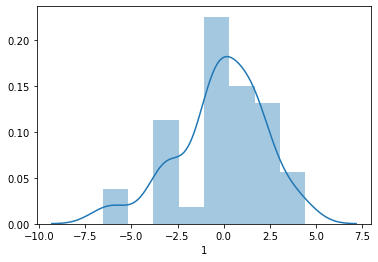

In [6]:
# histogram for January
sns.distplot(temp_df[1])

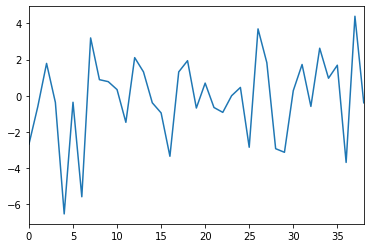

In [7]:
# January
temp_df[1].plot()

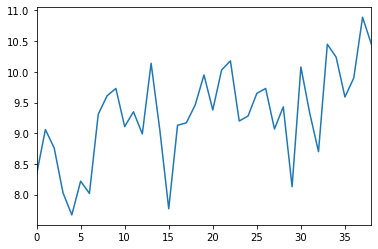

In [8]:
# annual temperature
temp_df[13].plot()

In [9]:
temp_df.set_index('YEAR', inplace = True)

In [10]:
df = pd.concat([temp_df.stack()], axis=1)

In [11]:
df.reset_index(inplace = True)

In [12]:
#data = temp_df.merge(hum_df, on = 'YEAR', suffixes = ['_temp','_hum'])
#data.info()

In [13]:
df.rename(columns = {'level_1':'month',0:'avg_temp'}, inplace = True)

In [14]:
#df['Y_M'] = df[['YEAR','month']].dot([100,1])

In [15]:
# encoding for months 
#cyclic encoding from deep learning notebook
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [16]:
def make_cyclic(month):
    a = np.sin((month-1)*(2.*np.pi/12))
    b = np.cos((month-1)*(2.*np.pi/12))
    return [a,b]

In [17]:
# Alsace prediction 
y = df.avg_temp
X = df.drop(['avg_temp','month'], axis = 1)
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [18]:
X_test[:10]

array([[-0.53311399,  1.27475488, -0.79056942],
       [ 0.17770466,  0.73598007,  1.08132295],
       [ 1.59934197, -0.73598007,  1.08132295],
       [-1.24393264, -0.73598007, -1.29214146],
       [ 1.33278497, -0.73598007,  1.08132295],
       [-1.24393264, -0.73598007,  1.08132295],
       [ 0.44426166,  1.27475488, -0.79056942],
       [-0.79967098, -1.27475488,  0.5797509 ],
       [ 1.51048964,  1.27475488, -0.79056942],
       [ 1.6881943 , -0.73598007, -1.29214146]])

# Linear regression with polynomials features

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

In [23]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [24]:
lr_model = LinearRegression()
lr_model.fit(x_poly, y_train)

pred = lr_model.predict(poly.fit_transform(X_test)) # polynolials 
print (r2_score(y_test, pred))
print ((sqrt(mean_squared_error(y_test, pred))))

0.8579220960832249
2.689992090977283


In [25]:
X_test.shape

(102, 3)

In [26]:
pred

array([12.26367188,  3.51757812,  3.84960938, 17.89648438,  3.73242188,
        2.83007812, 12.90820312,  4.88085938, 13.67578125, 19.30859375,
        5.03125   ,  8.58203125,  3.35742188,  2.43164062,  3.37695312,
       20.52929688, 18.04101562, 14.68554688,  2.73046875, 19.11132812,
        3.24804688, 17.31835938, 11.67382812, 14.93554688, 20.30078125,
       13.54101562,  2.87890625,  3.53125   ,  4.80078125, 13.81054688,
        7.69921875, 14.37890625,  3.51367188,  3.47851562,  3.57617188,
        4.90429688,  4.0390625 ,  3.41015625,  2.765625  , 13.76953125,
        9.21875   , 14.34179688,  8.93945312,  7.27539062,  2.43164062,
        3.953125  , 17.79296875, 16.46875   ,  9.0859375 ,  2.25390625,
        2.71289062, 14.27148438,  8.6015625 ,  4.8125    , 14.23632812,
       18.2890625 ,  5.65820312, 12.78710938, 19.00976562,  3.18554688,
        2.80273438,  7.22460938, 14.13476562, 16.27539062,  3.18945312,
        3.29296875, 20.19140625, 11.88085938,  2.33984375,  5.85

In [27]:
all_time = []
for month in range(1,13,1):
    deq = make_cyclic(month)
    deq.insert(0,2030)
    a = deq
    all_time.append(a)
    
    
    
all_time
    

[[2030, 0.0, 1.0],
 [2030, 0.49999999999999994, 0.8660254037844387],
 [2030, 0.8660254037844386, 0.5000000000000001],
 [2030, 1.0, 6.123233995736766e-17],
 [2030, 0.8660254037844387, -0.4999999999999998],
 [2030, 0.5000000000000003, -0.8660254037844385],
 [2030, 1.2246467991473532e-16, -1.0],
 [2030, -0.4999999999999997, -0.8660254037844388],
 [2030, -0.8660254037844385, -0.5000000000000004],
 [2030, -1.0, -1.8369701987210297e-16],
 [2030, -0.866025403784439, 0.49999999999999933],
 [2030, -0.5000000000000004, 0.8660254037844384]]

In [28]:
all_time = np.array(all_time)
all_time.shape

(12, 3)

In [29]:
processed_forecast = preprocessing.scale(all_time)


pred_forecast = lr_model.predict(poly.fit_transform((processed_forecast)))
pred_forecast

array([-2.03752579e+12, -1.53408848e+12, -3.89132799e+11,  6.29630095e+11,
        1.01876289e+12,  9.04458389e+11,  7.78265599e+11,  9.04458389e+11,
        1.01876289e+12,  6.29630095e+11, -3.89132799e+11, -1.53408848e+12])

# Support vector regression poly kernel 

Support vector regression will be used as a baseline. 

In [30]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train, y_train)
pred_svr = svr_rbf.predict(X_test)
print (r2_score(y_test, pred_svr))
print (sqrt(mean_squared_error(y_test, pred_svr)))


0.8660435172166643
2.611978515914804


In [31]:
processed_forecast = preprocessing.scale(all_time)
processed_forecast.shape

pred_forecast_svr = svr_rbf.predict((processed_forecast))
pred_forecast_svr

array([ 2.28475775,  2.33423644,  3.5102105 ,  7.91586341, 12.9312795 ,
       16.54262665, 18.48966183, 17.94539812, 14.37069696,  8.27541145,
        2.53135866,  1.09967198])